---
# Point Anomalies  
#### (Global Outliers)
<img src="../img/pointan.png" width="400">

---
# Distance Based Clustering
# k-Means Algorithmn

Is a method of vector quantization, and aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean

K-means finds cluster centers by minimizing the sum of squared distances from each point to its assigned cluster. Points are assigned to the cluster whose center is closest.

After initial centers are chosen, two steps repeat until the cluster assignment no longer changes for any point (which is equivalent to the cluster centers no longer moving):

Assign each point to the cluster with the closest center. Update each cluster center to the be mean of the assigned points.

![](../img/kmeans-alg.png)

![](../img/ad8.png)

Choosing k  
In k-means for anomaly detection we must choose a value for k. This is still an active area of research and no definitive answers.  
- The problem is much different than choosing a tuning parameter in regression or classification because there is no observable label to predict.
- The true risk R and estimated risk Rn decrease to 0 as k increases.
- Heuristic
K = minArg(sqrt(n/2)

Use case

Data :https://pythonhosted.org/bob/temp/bob.db.wine/doc/index.html

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
import pandas as pd
dataset = pd.read_csv('../datasets/wine_parvus.csv')

In [4]:
dataset.columns

Index(['Variety', 'Variety name', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [5]:
X = dataset[['Alcohol','Color intensity']]

In [6]:
X.describe()

,Alcohol,Color intensity
count,180.000000,180.000000
mean,13.010056,5.071889
std,0.849337,2.381056
min,11.030000,0.800000
25%,12.355000,3.200000
50%,13.050000,4.690000
75%,13.682500,6.212500
max,16.200000,13.000000


Scale

![](../img/standard.png)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means is relatively an efficient method. However, we need to specify the number of clusters, in advance and the final results are sensitive to initialization and often terminates at a local optimum. Unfortunately there is no global theoretical method to find the optimal number of clusters. A practical approach is to compare the outcomes of multiple runs with different k and choose the best one based on a predefined criterion or apply the so called ***"elbow method"*** heuristic shown below. In general, a large k probably decreases the error but increases the risk of overfitting.

Prior number of Clusters

In [8]:
K = int(np.sqrt(len(dataset) / 2.0))

In [9]:
print('Number of Clusters K: {}'.format(K))

Number of Clusters K: 9


Model

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters = K)

Use fit_predict to fit model and obtain cluster labels: labels

In [12]:
clusters = model.fit_predict(X_scaled)

In [13]:
clusters

array([4, 1, 8, 8, 7, 8, 1, 1, 1, 1, 7, 1, 1, 1, 1, 7, 7, 1, 1, 7, 8, 1,
       0, 8, 0, 8, 8, 8, 8, 1, 1, 1, 7, 8, 1, 8, 8, 8, 8, 8, 1, 1, 8, 1,
       8, 8, 1, 1, 1, 1, 7, 2, 1, 7, 1, 1, 1, 1, 8, 1, 5, 5, 0, 8, 0, 5,
       0, 8, 0, 8, 5, 5, 8, 8, 8, 3, 3, 8, 3, 5, 5, 5, 0, 5, 8, 3, 5, 5,
       3, 3, 5, 5, 3, 5, 5, 3, 5, 3, 5, 0, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5,
       3, 3, 5, 3, 3, 5, 3, 3, 5, 0, 5, 3, 3, 5, 8, 3, 5, 0, 3, 5, 5, 0,
       0, 0, 0, 0, 2, 5, 0, 8, 0, 0, 8, 8, 8, 2, 8, 1, 2, 7, 4, 7, 4, 2,
       4, 2, 2, 7, 2, 4, 4, 2, 1, 0, 0, 7, 1, 4, 4, 7, 7, 0, 4, 7, 7, 7,
       4, 4, 7, 6], dtype=int32)

In [14]:
dataset['cluster_id'] = clusters

In [15]:
dataset.groupby('cluster_id').count()['Variety'].reset_index()

,cluster_id,Variety
0,0,21
1,1,32
2,2,9
3,3,20
4,4,11
5,5,35
6,6,1
7,7,18
8,8,33


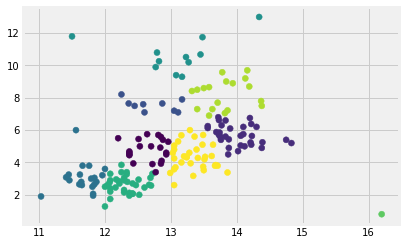

In [16]:
plt.scatter(dataset['Alcohol'], dataset['Color intensity'], c=clusters)

The model summary shows the usual fields about model schema, training time, and training iterations. It also shows that the K-means results are returned in two SFrames contained in the model: `cluster_id` and `cluster_info`. The cluster_info SFrame indicates the final cluster centers, one per row, in terms of the same features used to create the model.

The last three columns of the cluster_info SFrame indicate metadata about the corresponding cluster: ID number, number of points in the cluster, and the within-cluster sum of squared distances to the center.

In [17]:
groups = dataset.groupby(['cluster_id','Variety']).count()['Variety name'].reset_index()

In [18]:
groups.columns = ['cluster_id','Variety','count']

In [19]:
anomalies = groups[groups['count'] == 1]

In [20]:
anomalies

,cluster_id,Variety,count
5,2,1,1
8,4,1,1
11,5,3,1
12,6,3,1


In [21]:
g1 = anomalies.iloc[:,0].values
g2 = anomalies.iloc[:,1].values

In [22]:
anomalies_df = pd.DataFrame()
for i, j in zip(g1, g2):
    anomalies_df = anomalies_df.append(dataset[
        (dataset['cluster_id'] == i) & (dataset['Variety'] == j)])

In [23]:
anomalies_df

,Variety,Variety name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id
51,1,Babera,13.05,1.73,2.04,12.40,92.00,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.00,2
0,1,Babera,11.50,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,11.80,1.06,3.16,1115.71,4
137,3,Grignolino,12.25,4.72,2.54,21.00,89.00,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.00,5
179,3,Grignolino,16.20,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,0.80,0.68,1.68,629.90,6


In [24]:
dataset['anomaly'] = [1 if i in anomalies_df.index else 0 for i in dataset.index]   

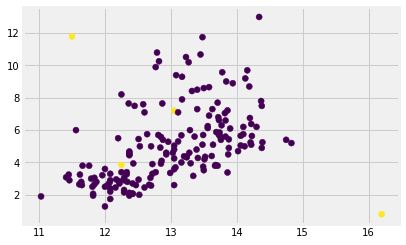

In [25]:
plt.scatter(dataset['Alcohol'], dataset['Color intensity'], c=dataset['anomaly'])

## Silhoutte Distance

Silhoutte Distance is used to study the separation between clusters. It can be used to evaluate and select the number of clusters. The formula is given by:

$$ s\left(i\right)=\frac{b\left(i\right)-a\left(i\right)}{\max\left(a\left(i\right),b\left(i\right)\right)} $$

Where, 
1. $a(i)$ = average distance of point $i$ with other members of same cluster. 
2. $b(i)$ = lowest of average distance of point $i$ with member of clusters other than the one it is currently present in. 

The value of $s(i)$ ranges from:

$$-1\le s\left(i\right)\le1$$

The value will be close to 1 when $b(i) >> a(i)$. That is when the nearest neighbor of point $i$ is very far & the members of clusters that $i$ is a part of aren't very far apart. This is the case when the clustering has worked well. 

The opposite case is when the value is close to -1. This happens when $a(i) >> b(i)$. That is when the the average distance of point within cluster is more than that of the neighboring one, then this indicates that the current point would do better if it is assigned to the neighboring one. 

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
scores = []
for K in range(2, 30):
    model = KMeans(n_clusters = K)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

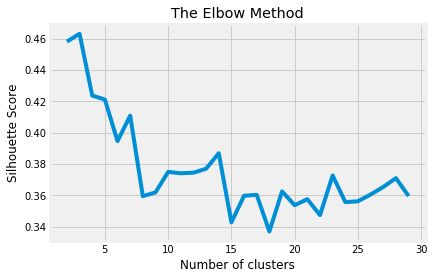

In [28]:
plt.plot(range(2, 30), scores)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()